1. Wczytanie danych


In [31]:
# import niezbędnych zależności:
import pandas as pd
import matplotlib.pyplot as plt

# wczytanie danych z pliku .csv i przypisanie ich do zmiennej df jako DataFrame wraz z ignorowaniem pierwszej kolumny jako index:
df = pd.read_csv("vod_data.csv", index_col=False)

# pokazanie pierwszych kilku wierszy tabeli:
print(df.head())

   Unnamed: 0             datetime  duration  \
0       58773  2017-01-01 01:15:09       0.0   
1       58774  2017-01-01 13:56:02       0.0   
2       58775  2017-01-01 15:17:47   10530.0   
3       58776  2017-01-01 16:04:13      49.0   
4       58777  2017-01-01 19:16:37       0.0   

                                title  \
0  Angus, Thongs and Perfect Snogging   
1        The Curse of Sleeping Beauty   
2                   London Has Fallen   
3                            Vendetta   
4     The SpongeBob SquarePants Movie   

                                              genres release_date    movie_id  \
0                             Comedy, Drama, Romance   2008-07-25  26bd5987e8   
1                 Fantasy, Horror, Mystery, Thriller   2016-06-02  f26ed2675e   
2                                   Action, Thriller   2016-03-04  f77e500e7a   
3                                      Action, Drama   2015-06-12  c74aec7673   
4  Animation, Action, Adventure, Comedy, Family, ...   2004

2. Czyszczenie i przygotowanie danych


In [32]:
# usunięcie pierwszej kolumny z indeksami:
df = df.drop(columns=["Unnamed: 0"])

# zresetowanie indeksów dataFrame'a. Istniejący indeks jest usuwany i zastąpiony przez nowy, numeryczny.
df = df.reset_index(drop=True)

# przekształcenie kolumny "datetime" na typ daty i czasu:
df["datetime"] = pd.to_datetime(df["datetime"])

# ustawienie wartości NOT AVAILABLE w kolumnie release_date jako brakujące:
df.loc[df["release_date"] == "NOT AVAILABLE", "release_date"] = pd.NaT

# ponowne przekształcenie kolumny "datetime" na typ daty i czasu wraz z parametrem errors="coerce" aby przekształcić brakujące wartości na typ NaN:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

print(df.head())

             datetime  duration                               title  \
0 2017-01-01 01:15:09       0.0  Angus, Thongs and Perfect Snogging   
1 2017-01-01 13:56:02       0.0        The Curse of Sleeping Beauty   
2 2017-01-01 15:17:47   10530.0                   London Has Fallen   
3 2017-01-01 16:04:13      49.0                            Vendetta   
4 2017-01-01 19:16:37       0.0     The SpongeBob SquarePants Movie   

                                              genres release_date    movie_id  \
0                             Comedy, Drama, Romance   2008-07-25  26bd5987e8   
1                 Fantasy, Horror, Mystery, Thriller   2016-06-02  f26ed2675e   
2                                   Action, Thriller   2016-03-04  f77e500e7a   
3                                      Action, Drama   2015-06-12  c74aec7673   
4  Animation, Action, Adventure, Comedy, Family, ...   2004-11-19  a80d6fc2aa   

      user_id  
0  1dea19f6fe  
1  544dcbc510  
2  7cbcc791bf  
3  ebf43c36b6  
4  a57

3. Przekształcenie danych


In [33]:
# utworzenie tablicy lat dla których chcemy badać popularność filmów:
years_of_interest = [2017, 2018, 2019]

# wybór filmów z wybranych lat:
df_filtered = df[df["datetime"].dt.year.isin(years_of_interest)]

# powielenie elementów dla każdego genres:
genres_df = (
    df_filtered["genres"]
    .str.split(", ", expand=True)
    .stack()
    .reset_index(level=1, drop=True)
)
genres_df.name = "genre"

# Połączenie oryginalnego DataFrame z nowym DataFrame z podziałem gatunków:
df_split = df_filtered.drop("genres", axis=1).join(genres_df)

# tabela przestawna do zliczenia popularności gatunków w poszczególnych latach. Agreguje dane korzystając z liczby filmów każdego gatunku w danym roku. Wartości puste są zasepowane zerami:
genres_popularity_df = df_split.pivot_table(
    index="genre", columns=df_split["datetime"].dt.year, aggfunc="size", fill_value=0
)

# print(genres_df)
# print(df_split)
print(genres_popularity_df)

datetime        2017    2018   2019
genre                              
Action         73978   87717  45014
Adventure      56416   69275  34929
Animation      16205   15818   7360
Biography      14692   17631   9972
Comedy         95080  107426  53695
Crime          42401   43646  27611
Documentary    27470   19867  15367
Drama          95267  112657  61338
Family         24336   23161  11185
Fantasy        35059   38231  20557
Film-Noir         19      64     16
History        10925   13622   3919
Horror         19121   24264  14286
Music           6364    7117   7991
Musical         4298    4621   2469
Mystery        23318   30165  19096
NOT AVAILABLE  10391   10429   5741
News            1057     442    158
Reality-TV         0     819     89
Romance        44215   49098  28192
Sci-Fi         39320   52363  29628
Short           1928    1662   1385
Sport           6591    6531   3772
Talk-Show          0       0     77
Thriller       66125   75408  40728
War             8394   10675

In [34]:
# Usunięcie wiersza z wartościami "NOT AVAILABLE"
genres_popularity_df = genres_popularity_df.drop("NOT AVAILABLE")

print(genres_popularity_df)

datetime      2017    2018   2019
genre                            
Action       73978   87717  45014
Adventure    56416   69275  34929
Animation    16205   15818   7360
Biography    14692   17631   9972
Comedy       95080  107426  53695
Crime        42401   43646  27611
Documentary  27470   19867  15367
Drama        95267  112657  61338
Family       24336   23161  11185
Fantasy      35059   38231  20557
Film-Noir       19      64     16
History      10925   13622   3919
Horror       19121   24264  14286
Music         6364    7117   7991
Musical       4298    4621   2469
Mystery      23318   30165  19096
News          1057     442    158
Reality-TV       0     819     89
Romance      44215   49098  28192
Sci-Fi       39320   52363  29628
Short         1928    1662   1385
Sport         6591    6531   3772
Talk-Show        0       0     77
Thriller     66125   75408  40728
War           8394   10675   3232
Western       2959    4782   1372


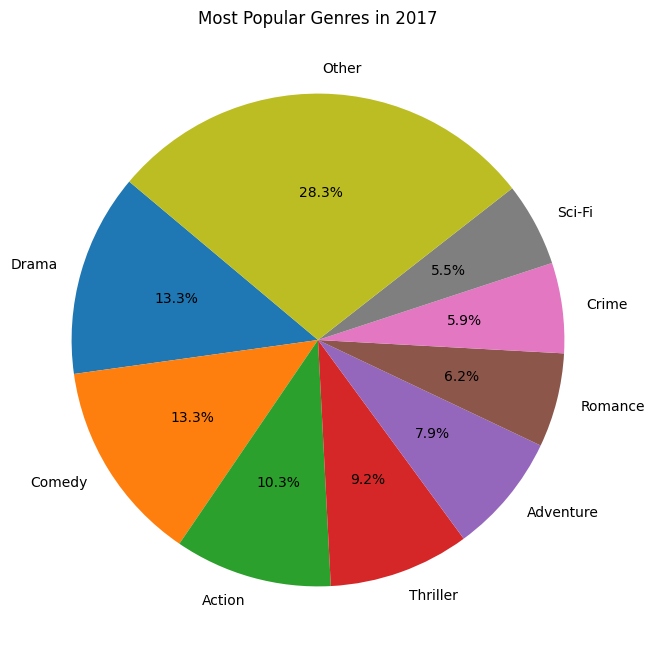

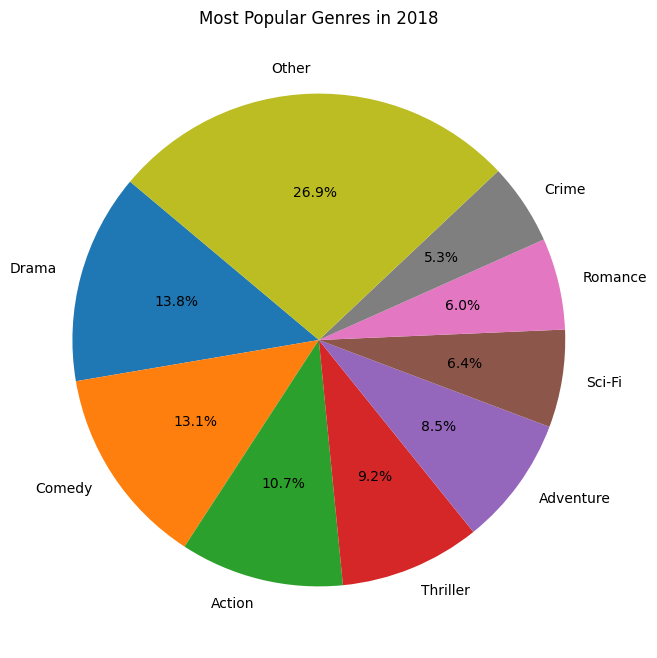

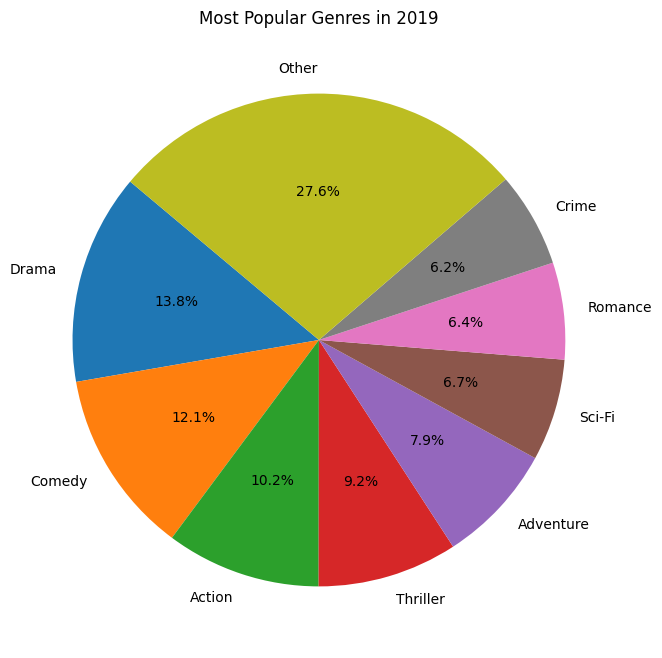

In [36]:
# Zdefiniowanie funkcji do utworzenia wykresu kołowego dla danego roku:
def plot_pie_chart(year_data, year):

    # Posortowanie danych malejąco:
    sorted_data = year_data.sort_values(ascending=False)

    # Wybranie kategorii i wartości, które mają ponad 5% popularności":
    top_categories = sorted_data[sorted_data >= 0.05 * sorted_data.sum()]

    # Sumowanie wartości mniejszych niż 5% jako "inne":
    other = sorted_data[sorted_data < 0.05 * sorted_data.sum()].sum()

    if other > 0:
        top_categories["Other"] = other

# Utworzenie wykresu kołowego:
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_categories, labels=top_categories.index, autopct="%1.1f%%", startangle=140
    )
    plt.title(f"Most Popular Genres in {year}")
    plt.show()

# Poprawa imion kolumn do stringów:
genres_popularity_df.columns = genres_popularity_df.columns.astype(str)

# Utworzenie wykresów dla każdego roku:
for year in ["2017", "2018", "2019"]:
    plot_pie_chart(genres_popularity_df[year], year)